In [1]:
import ROOT as rt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
snova_tree='tpcdigit_snova_tree'
snova_bran='tpcdigit_snova_branch'
snova_tc = rt.TChain(snova_tree)
snova_tc.AddFile("aho_snova.root")

trig_tree='tpcdigit_trig_tree'
trig_bran='tpcdigit_trig_branch'
trig_tc = rt.TChain(trig_tree)
trig_tc.AddFile("aho_trig.root")

1

In [3]:
snova_tc.GetEntry(1249)
exec('snova_br=snova_tc.%s'%snova_bran)

trig_tc.GetEntry(1)
exec('trig_br=trig_tc.%s'%trig_bran)

In [4]:
print" ================== "
print snova_br.Event(),snova_br.Frame()
print" ================== "

for b in xrange(snova_br.size()):
    print snova_br[b].ChannelNumber(),snova_br[b].TimeStamp(),snova_br[b].Frame()

1251 1250
32 2978.0 34
33 2984.0 34
34 2991.0 34
35 2997.0 34
36 3003.0 34
37 3010.0 34
38 3017.0 34
39 3024.0 34
40 3029.0 34
40 3707.0 34
41 3035.0 34
42 3042.0 34
43 3048.0 34
44 3054.0 34
45 3061.0 34
46 3067.0 34
46 3750.0 34
47 3074.0 34
48 3080.0 34
49 3086.0 34
50 3093.0 34
51 3100.0 34
51 3789.0 34
52 3106.0 34
52 3795.0 34
53 3112.0 34
53 3803.0 34
54 3117.0 34
55 1462.0 34
55 3120.0 34
56 3131.0 34
56 3254.0 34
57 3136.0 34
57 3244.0 34
58 3143.0 34
58 3236.0 34
59 3149.0 34
59 3136.0 34
59 3228.0 34
60 3156.0 34
60 3008.0 34
60 3125.0 34
60 3221.0 34
60 3250.0 34
61 3160.0 34
61 3117.0 34
61 3175.0 34
61 3217.0 34
62 3167.0 34
62 3065.0 34
62 3106.0 34
62 3207.0 34
63 3173.0 34
63 3881.0 34


In [55]:
print" ================== "
print trig_br.Event(),trig_br.Frame()
print" ================== "

for b in xrange(trig_br.size()):
    print b,trig_br[b].ChannelNumber(),trig_br[b].TimeStamp()

1 1250
0 0 4294967287.0
1 1 4294967287.0
2 2 4294967287.0
3 3 4294967287.0
4 4 4294967287.0
5 5 4294967287.0
6 6 4294967287.0
7 7 4294967287.0
8 8 4294967287.0
9 9 4294967287.0
10 10 4294967287.0
11 11 4294967287.0
12 12 4294967287.0
13 13 4294967287.0
14 14 4294967287.0
15 15 4294967287.0
16 16 4294967287.0
17 17 4294967287.0
18 18 4294967287.0
19 19 4294967287.0
20 20 4294967287.0
21 21 4294967287.0
22 22 4294967287.0
23 23 4294967287.0
24 24 4294967287.0
25 25 4294967287.0
26 26 4294967287.0
27 27 4294967287.0
28 28 4294967287.0
29 29 4294967287.0
30 30 4294967287.0
31 31 4294967287.0
32 32 4294967287.0
33 33 4294967287.0
34 34 4294967287.0
35 35 4294967287.0
36 36 4294967287.0
37 37 4294967287.0
38 38 4294967287.0
39 39 4294967287.0
40 40 4294967287.0
41 41 4294967287.0
42 42 4294967287.0
43 43 4294967287.0
44 44 4294967287.0
45 45 4294967287.0
46 46 4294967287.0
47 47 4294967287.0
48 48 4294967287.0
49 49 4294967287.0
50 50 4294967287.0
51 51 4294967287.0
52 52 4294967287.0
53 53 

In [6]:
%matplotlib inline
matplotlib.rcParams['font.size']=30
matplotlib.rcParams['font.family']='serif'

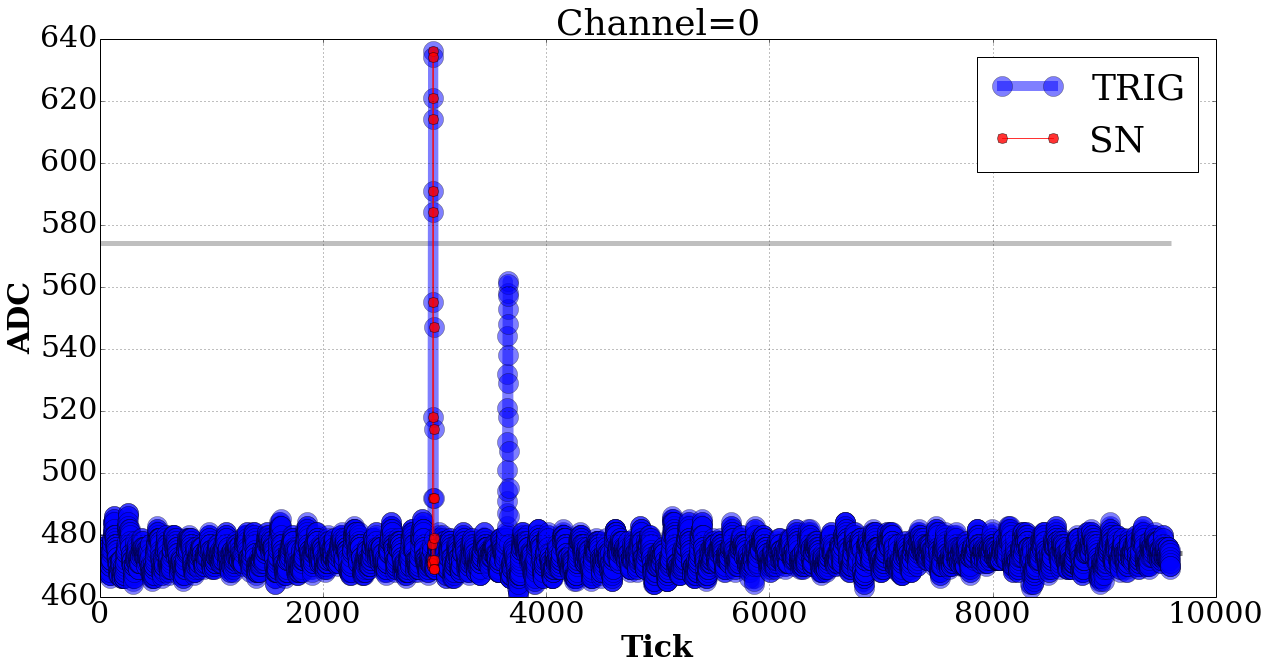

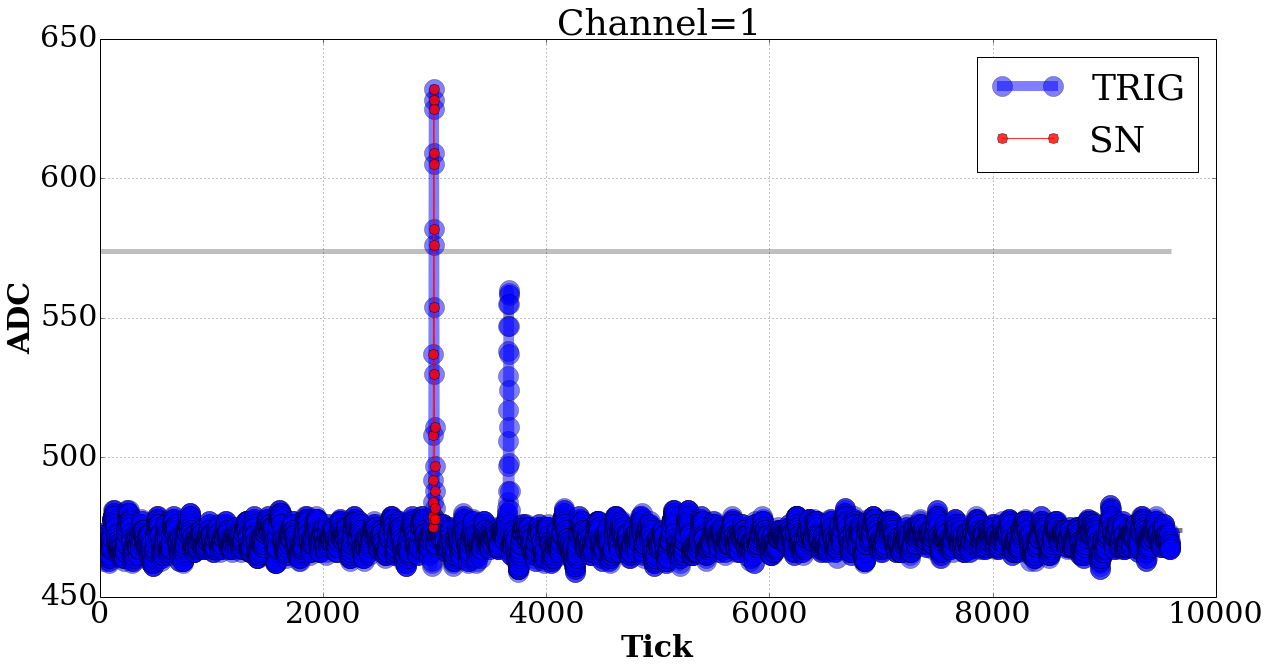

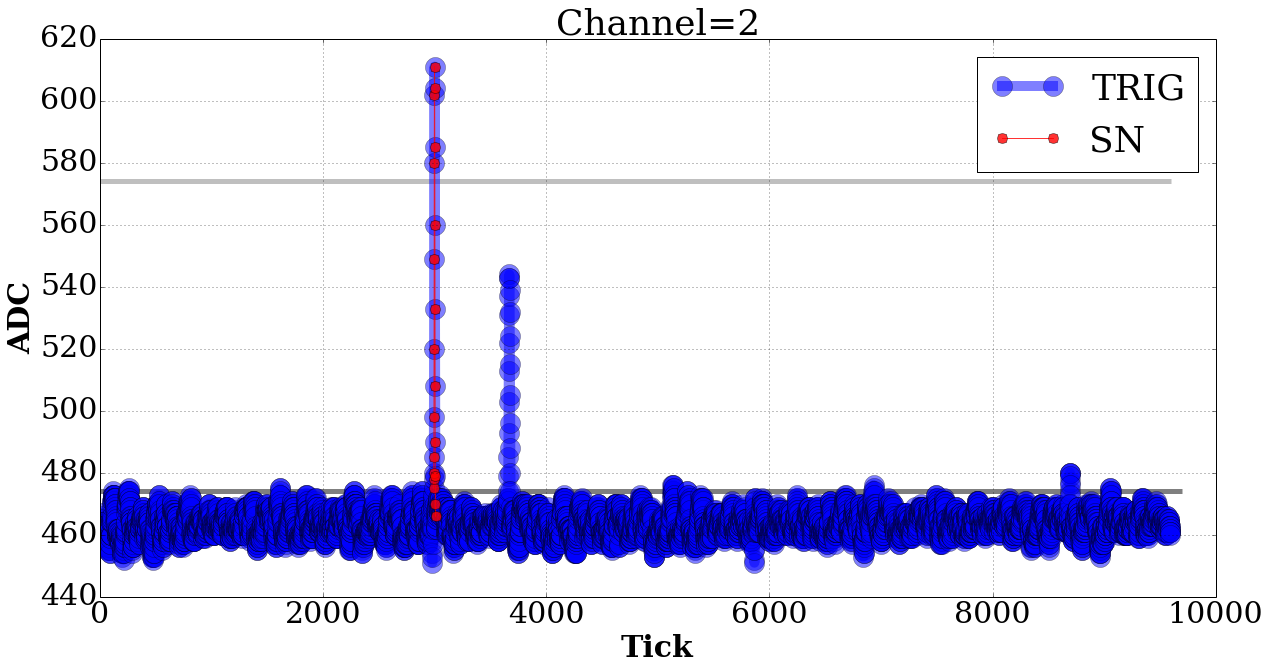

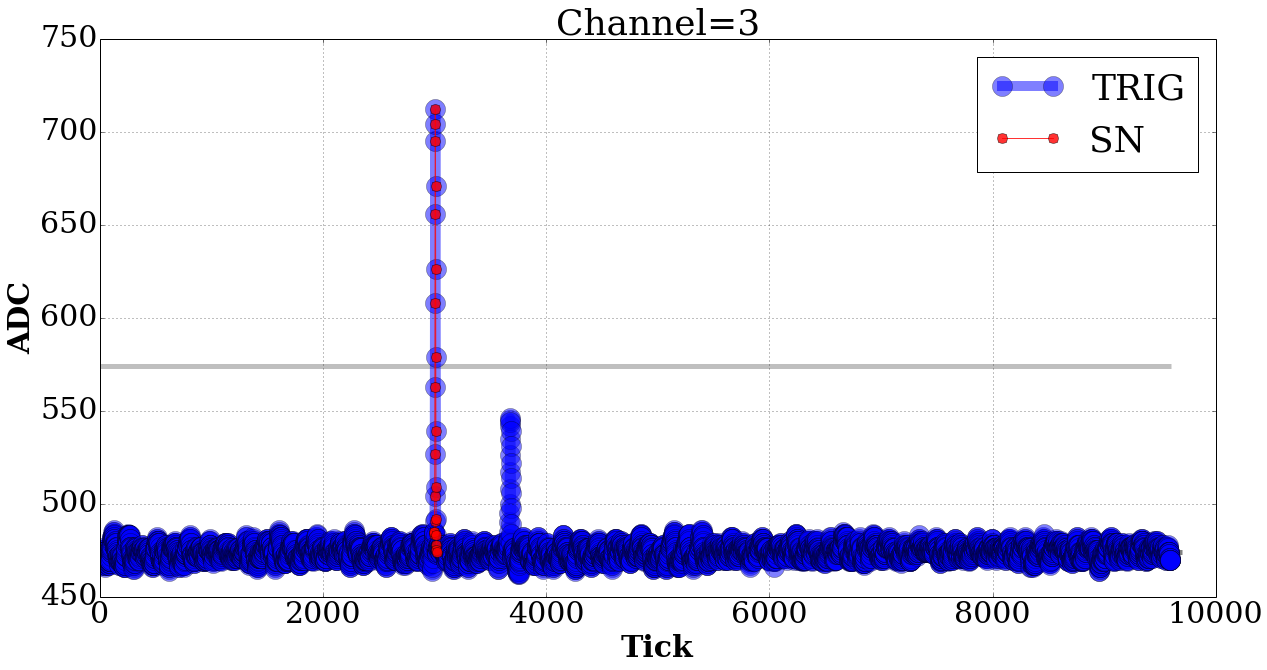

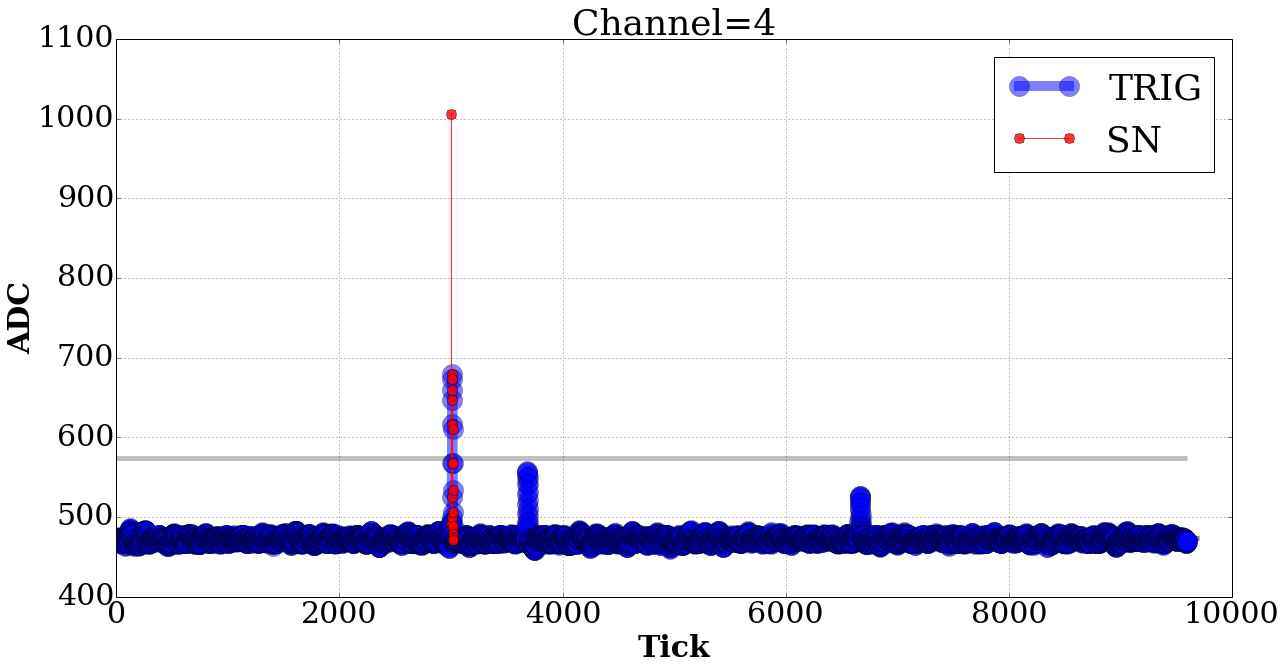

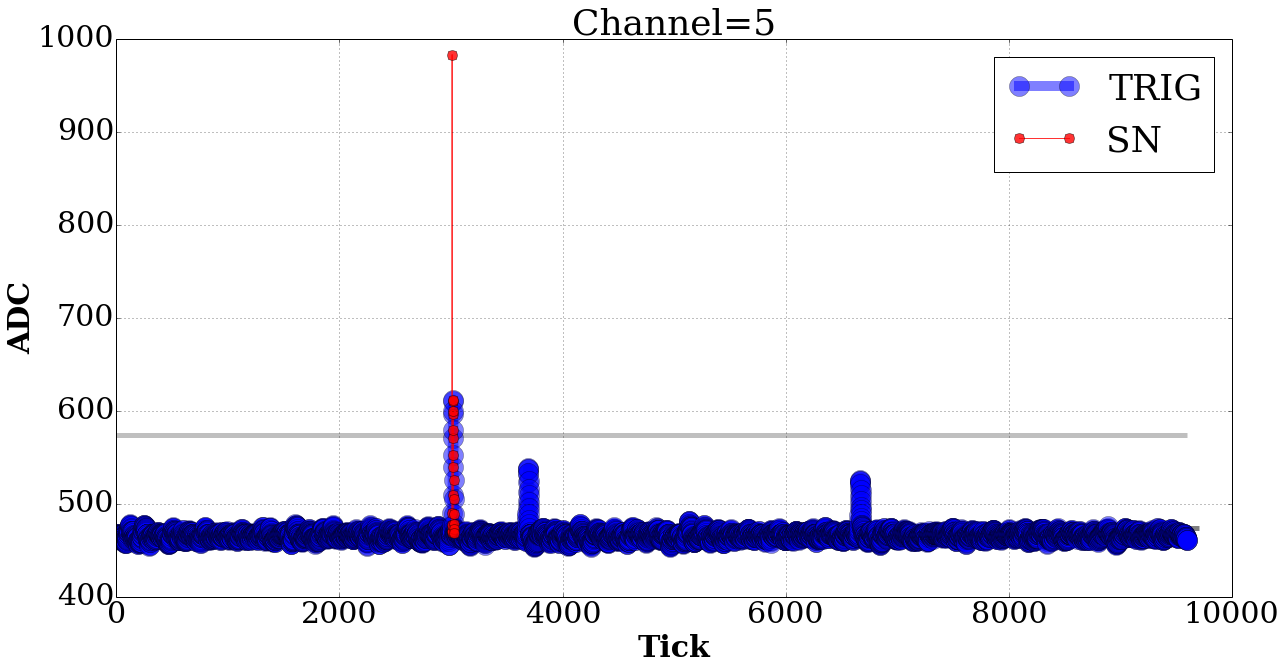

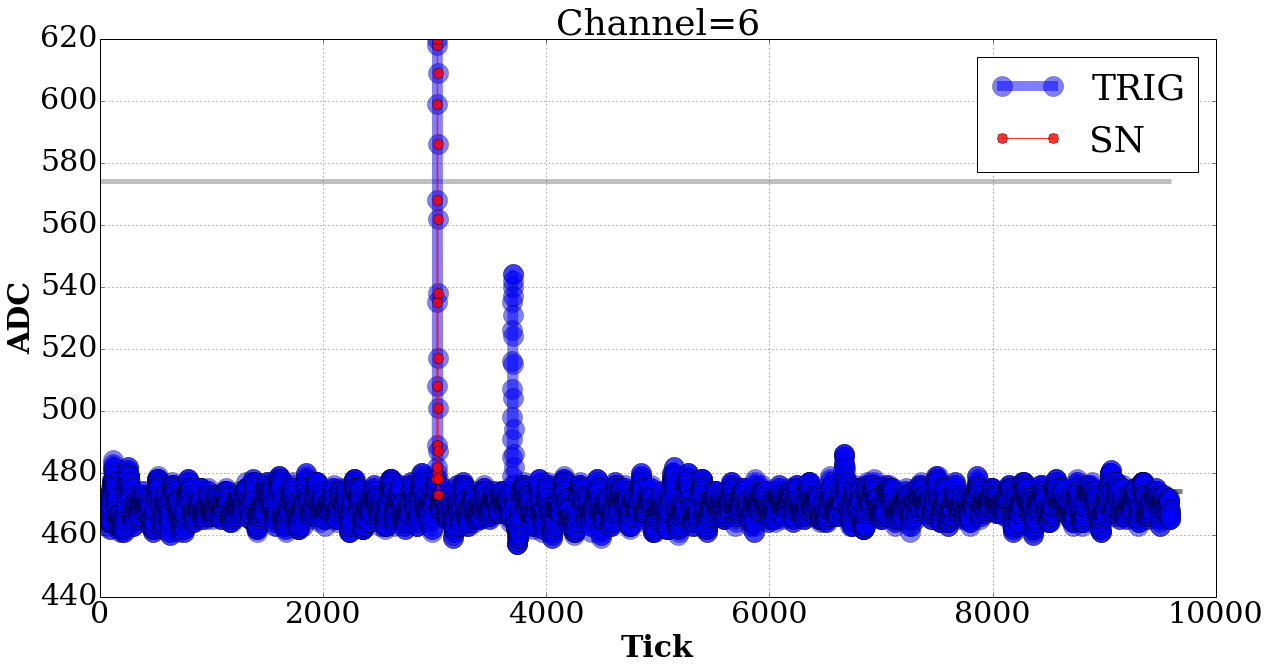

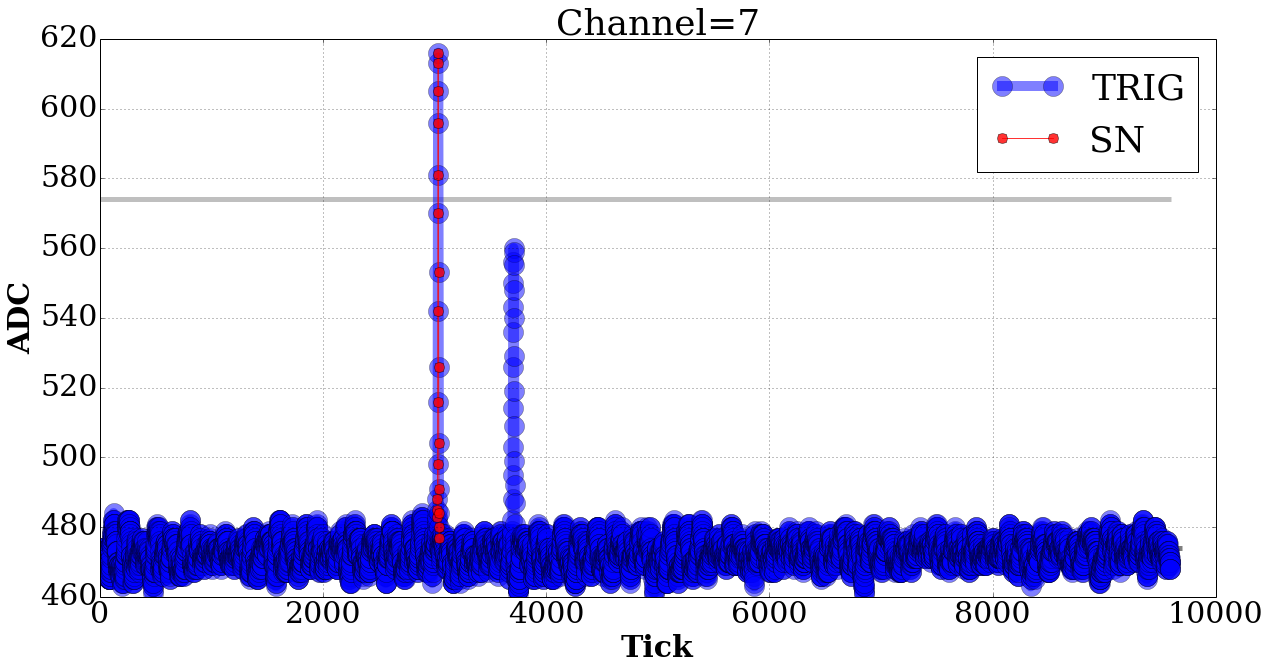

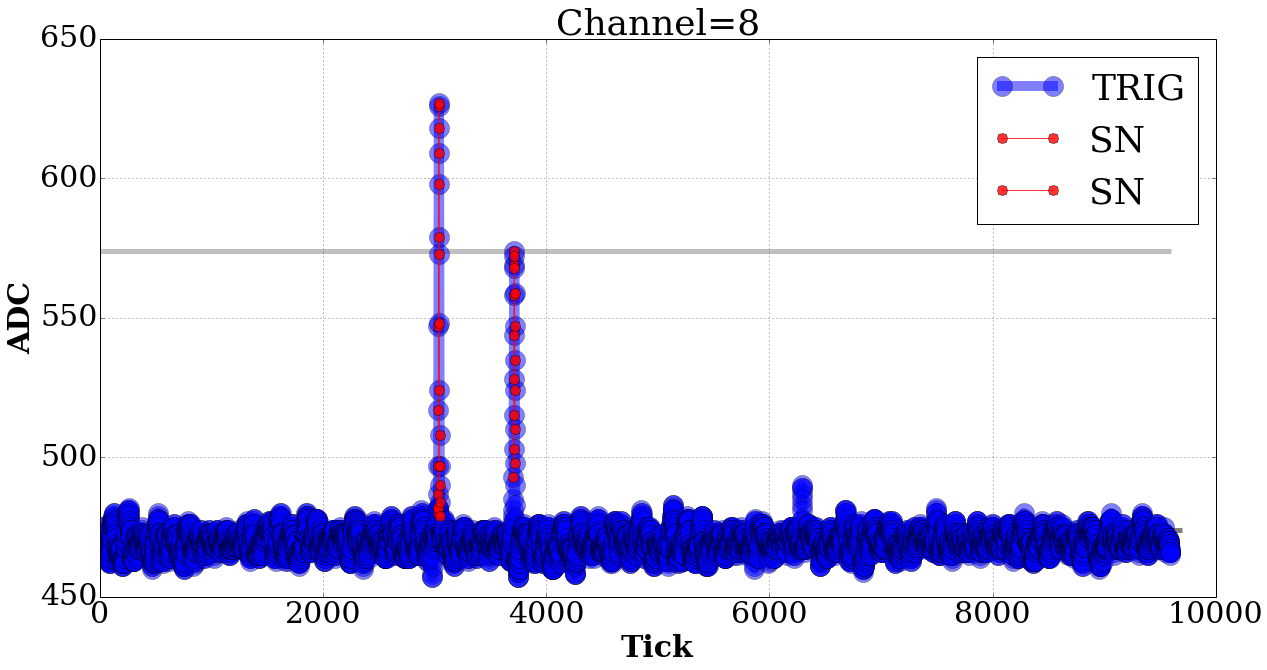

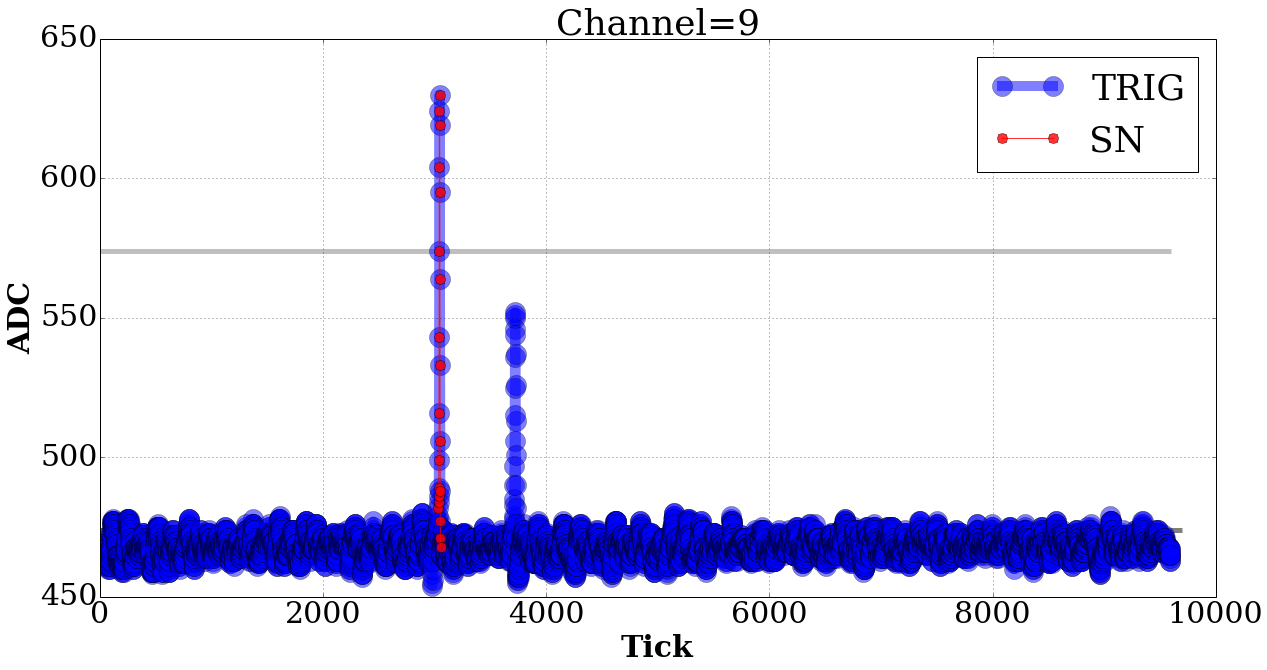

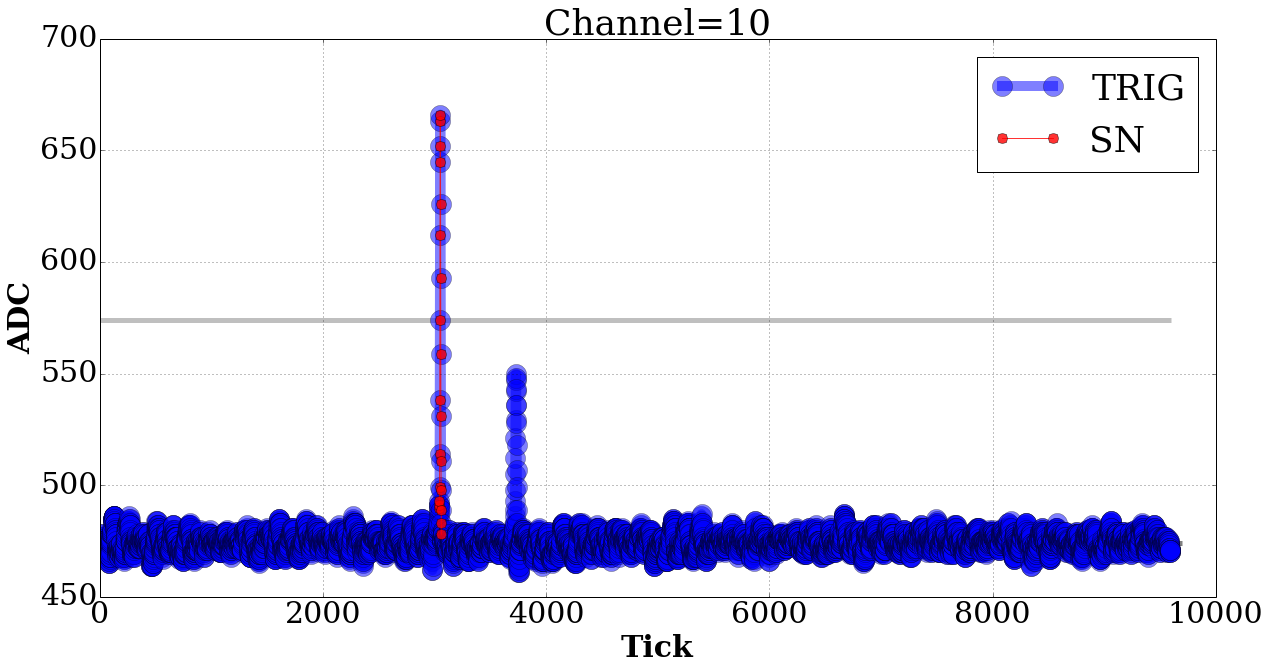

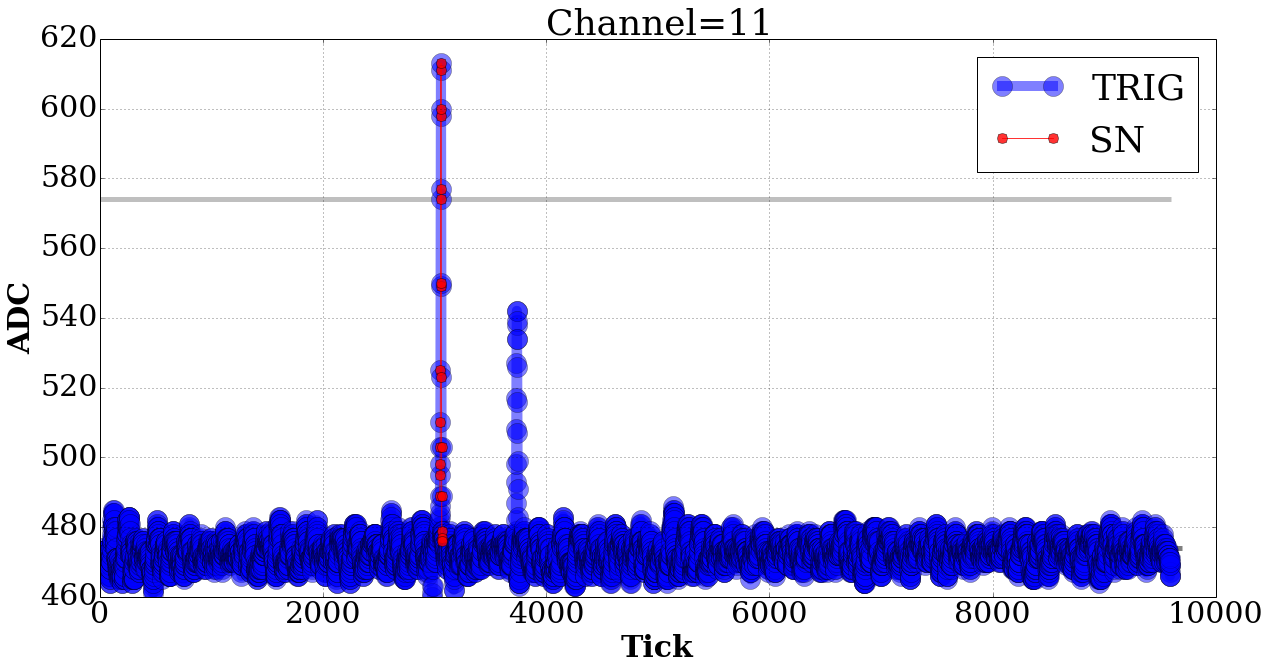

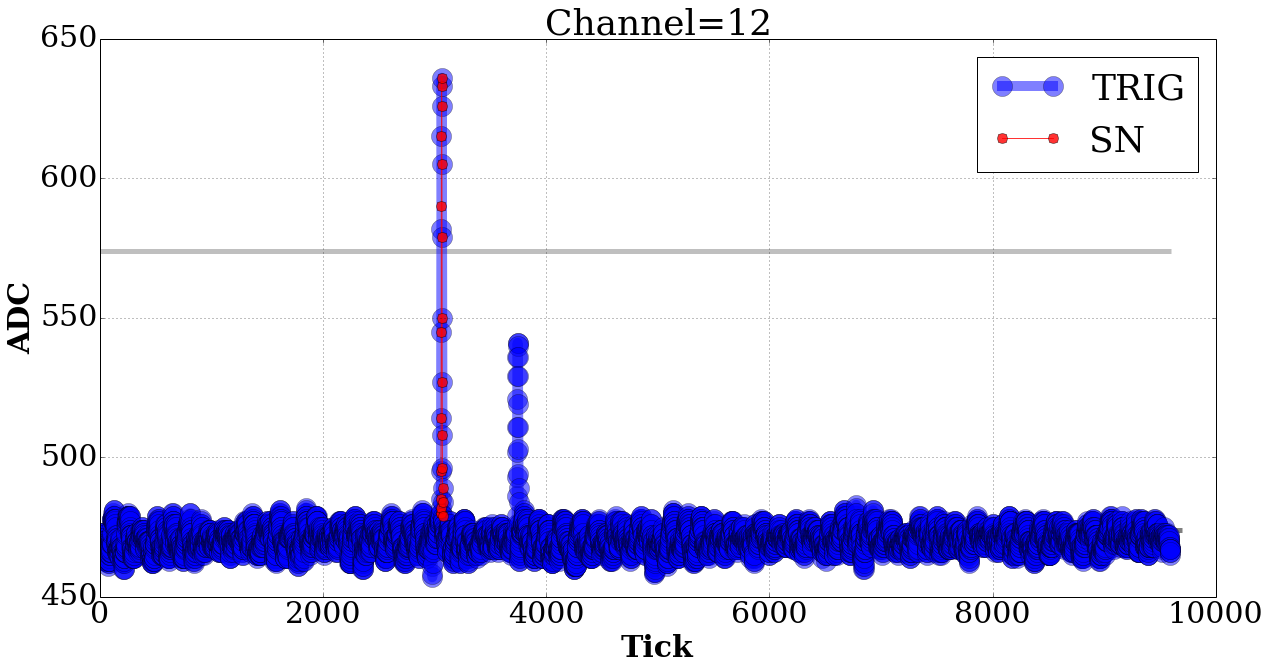

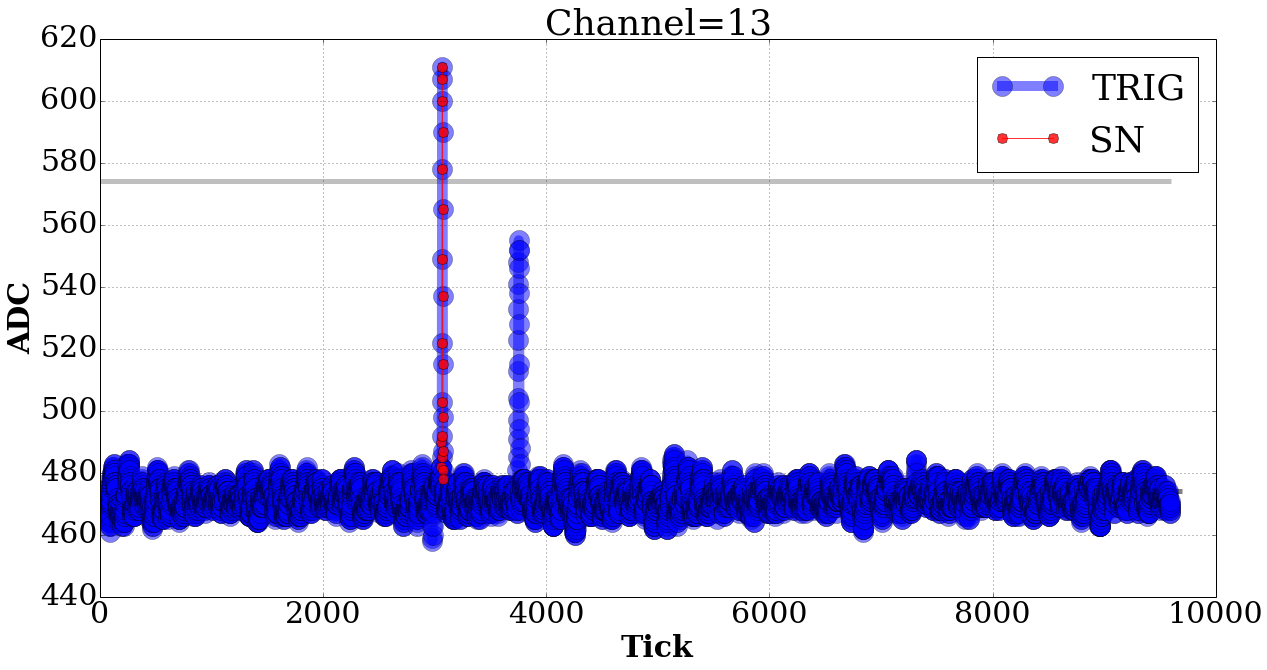

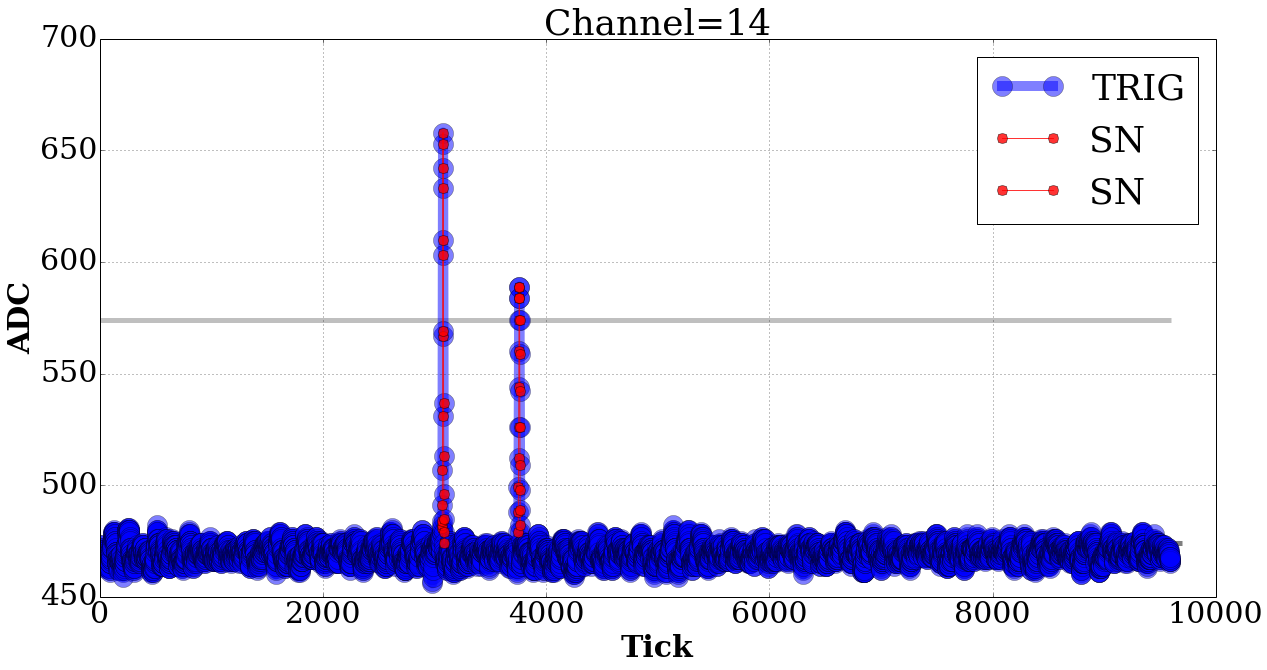

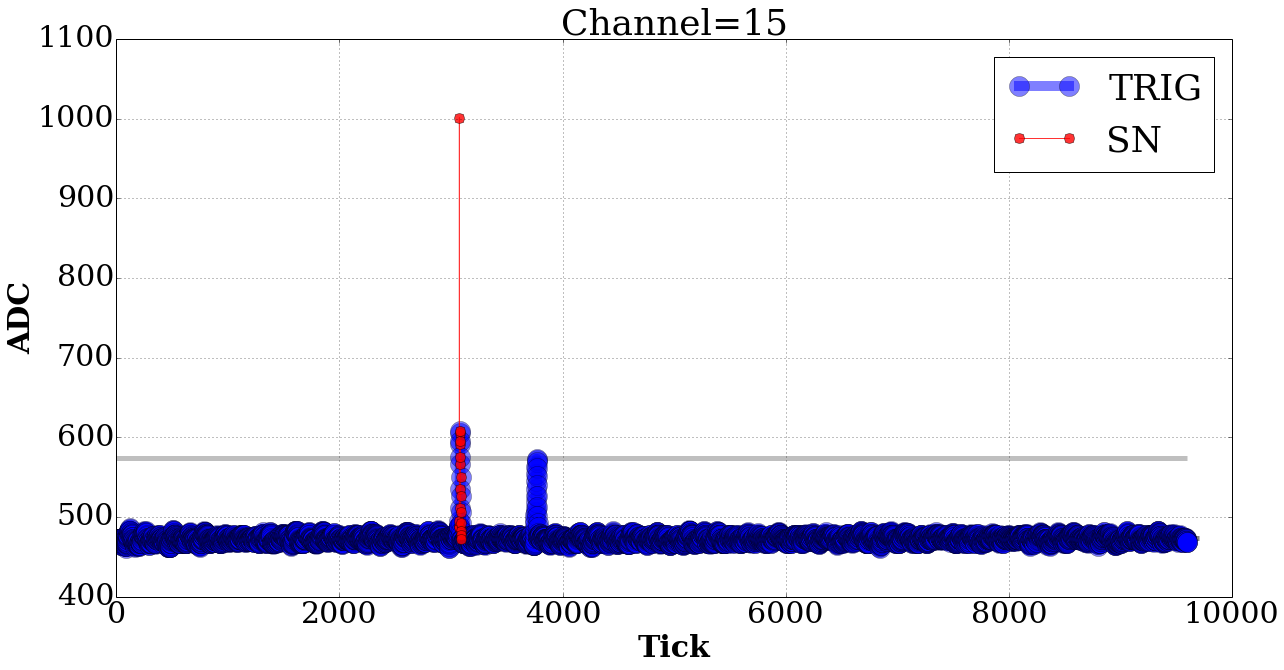

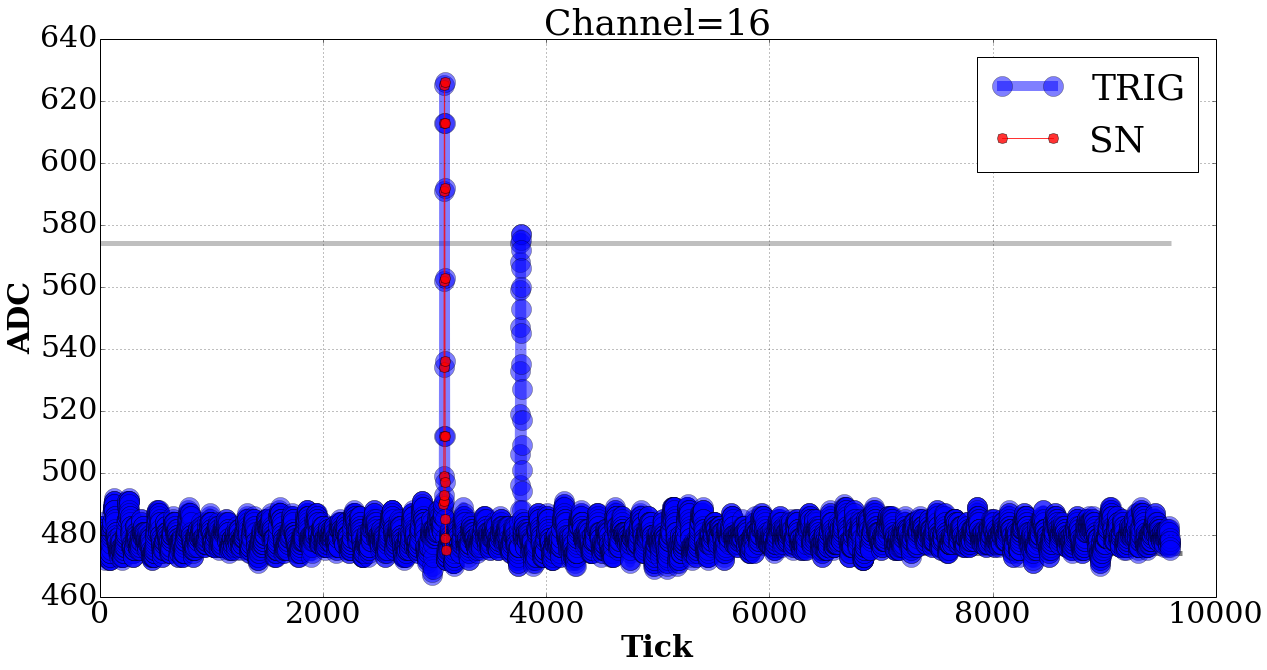

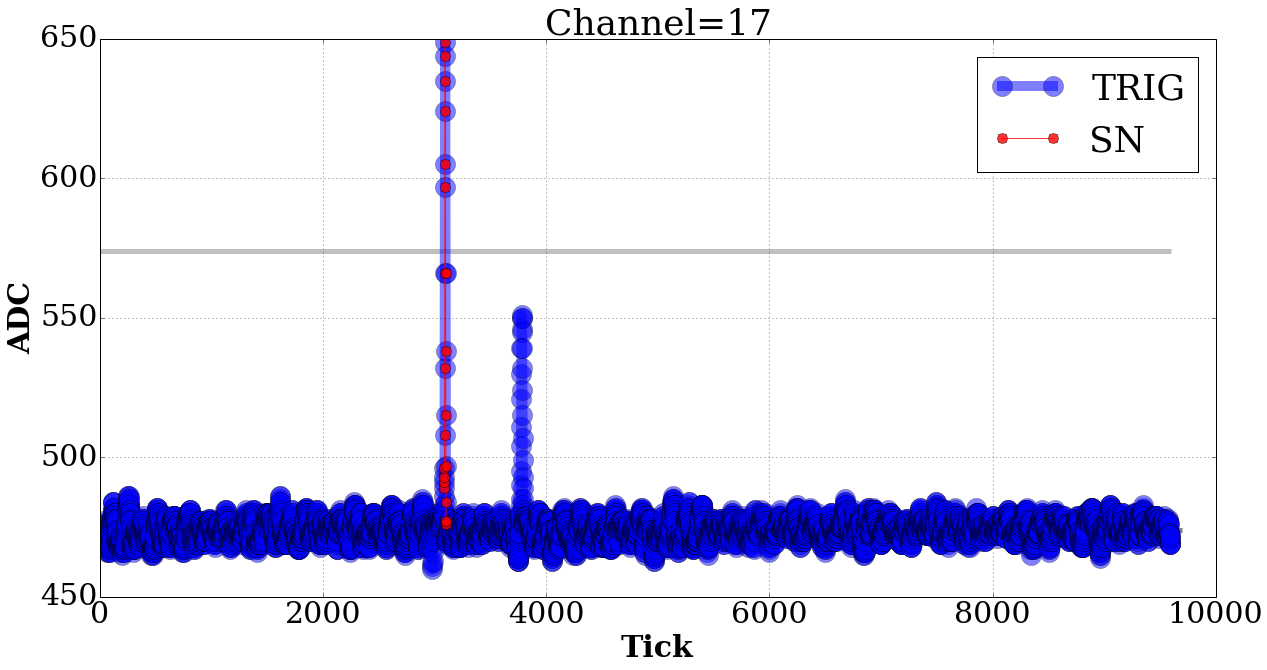

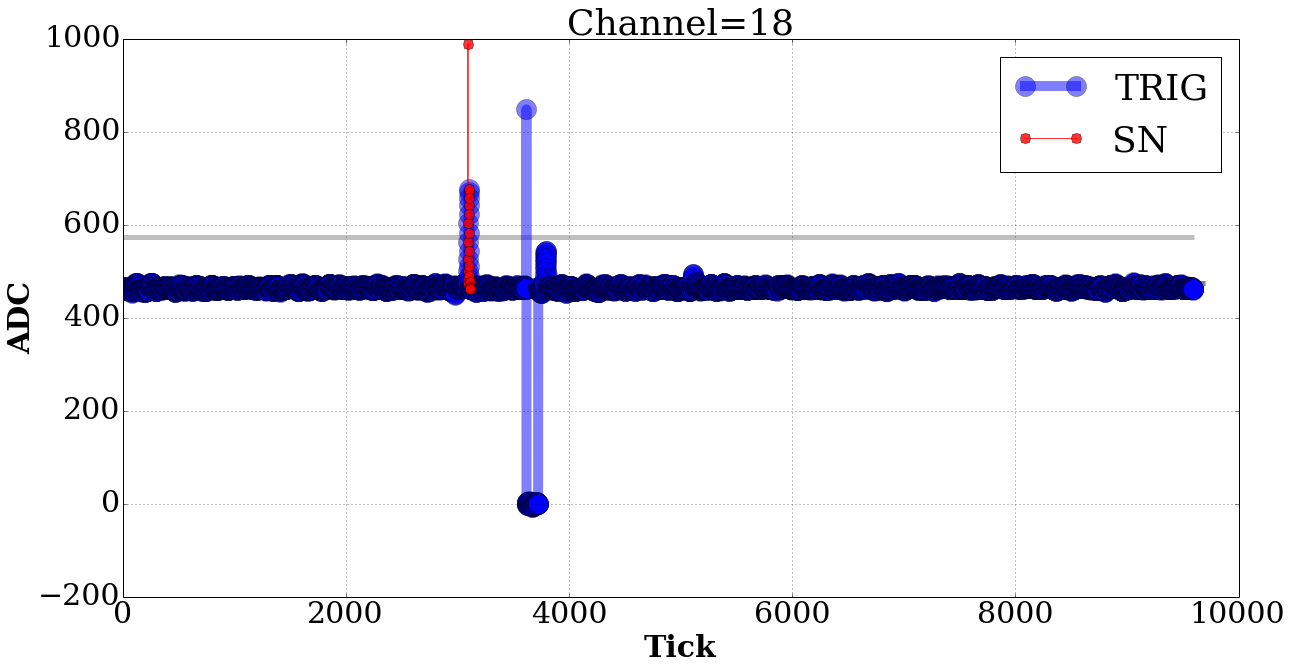

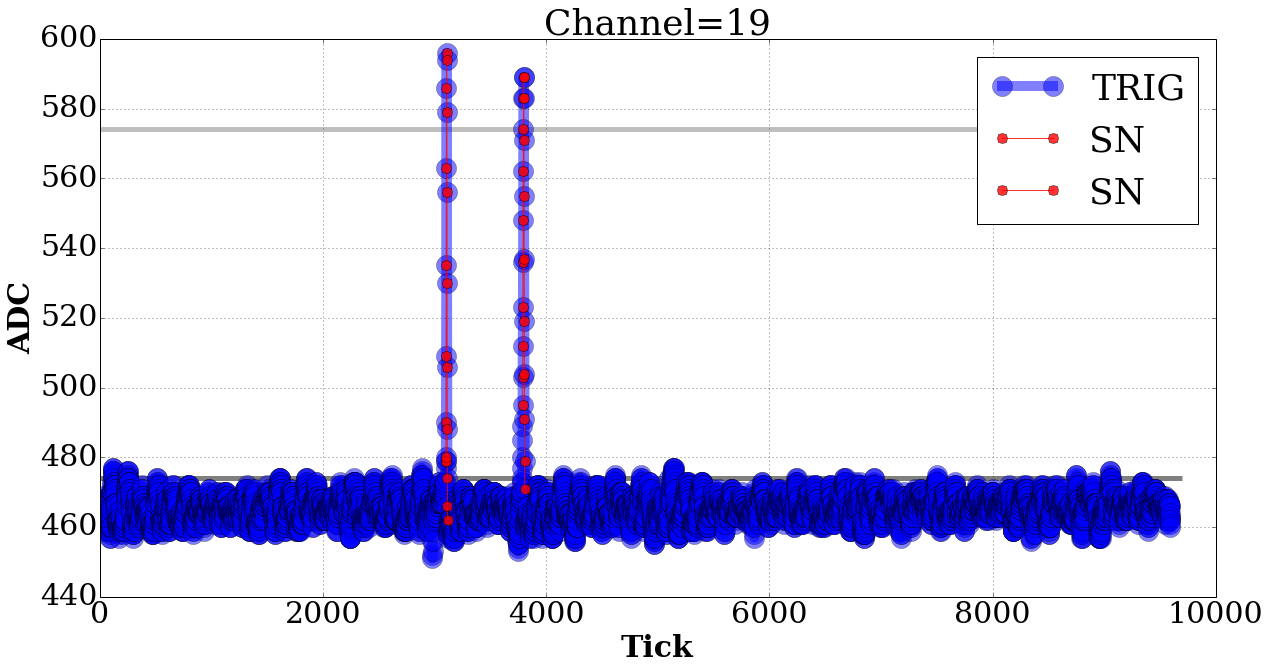

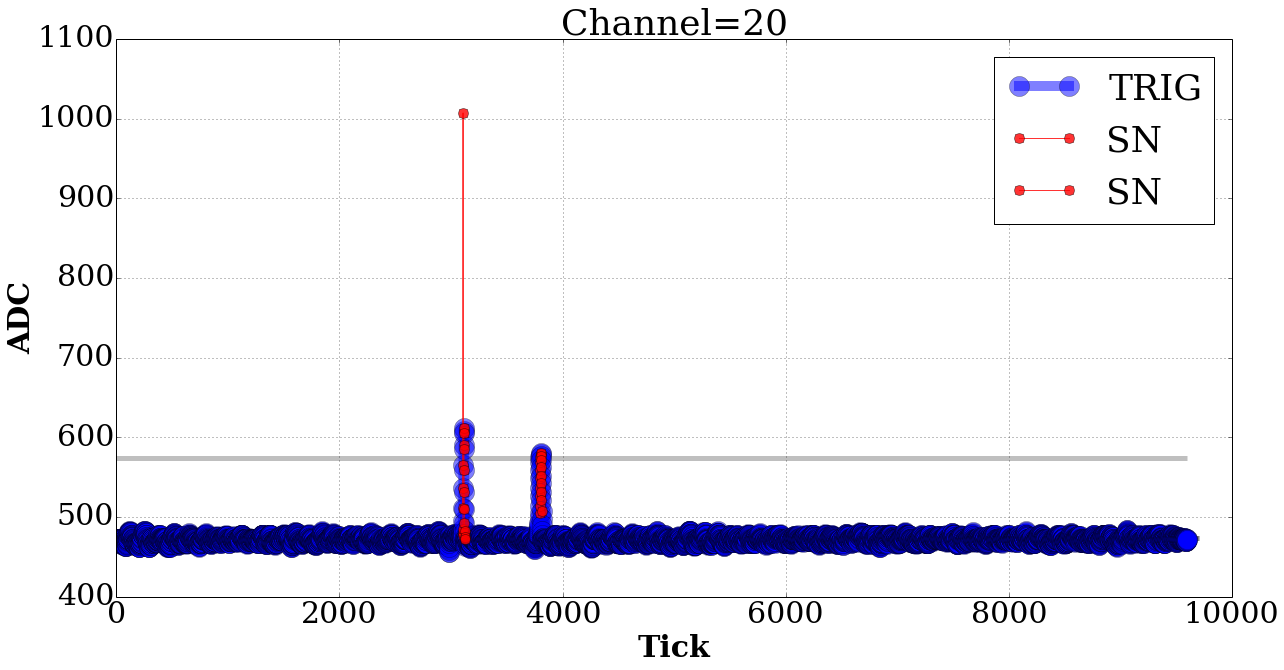

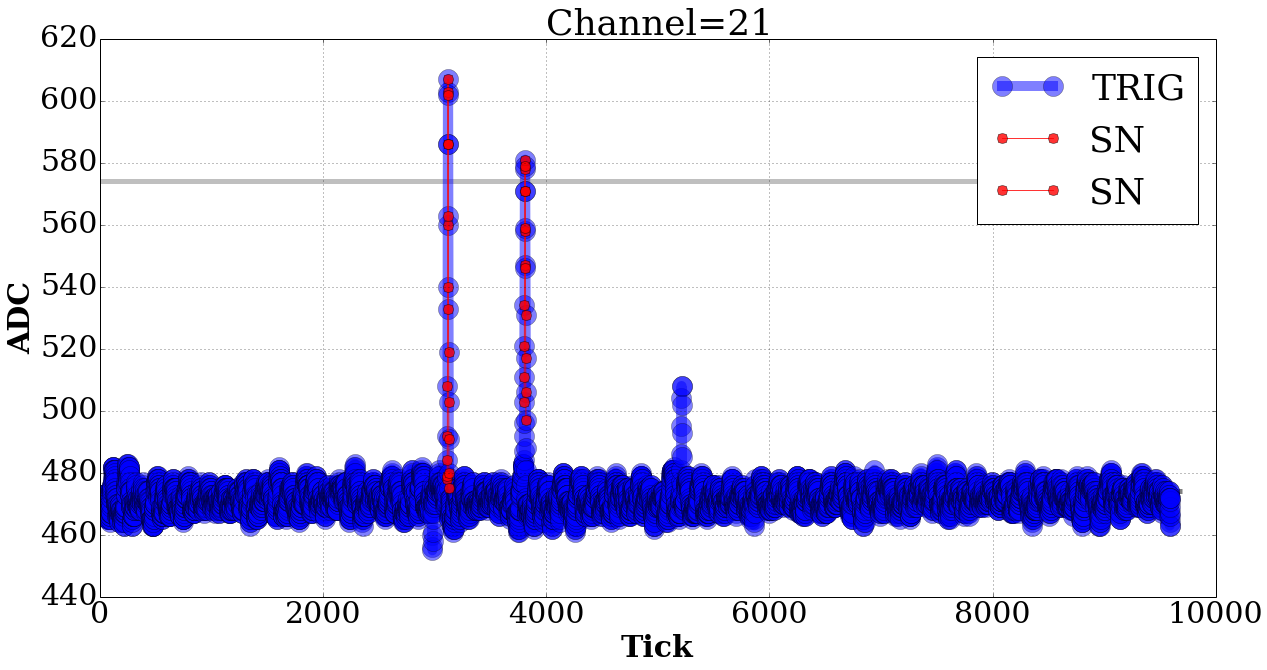

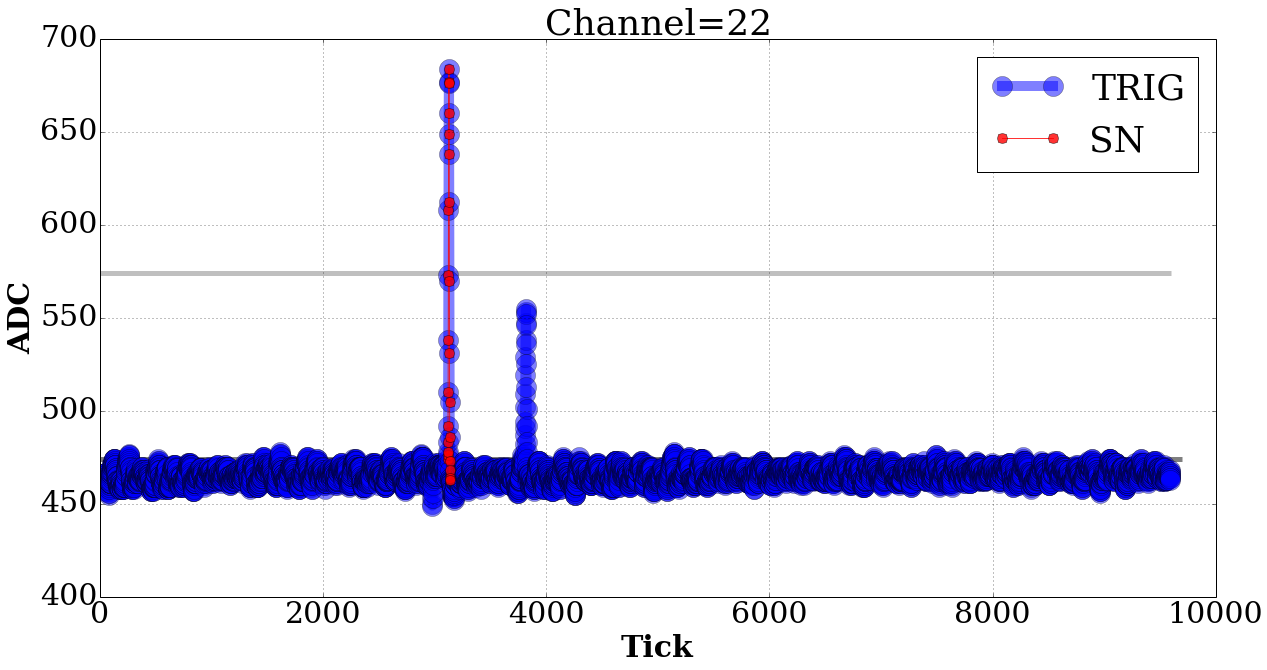

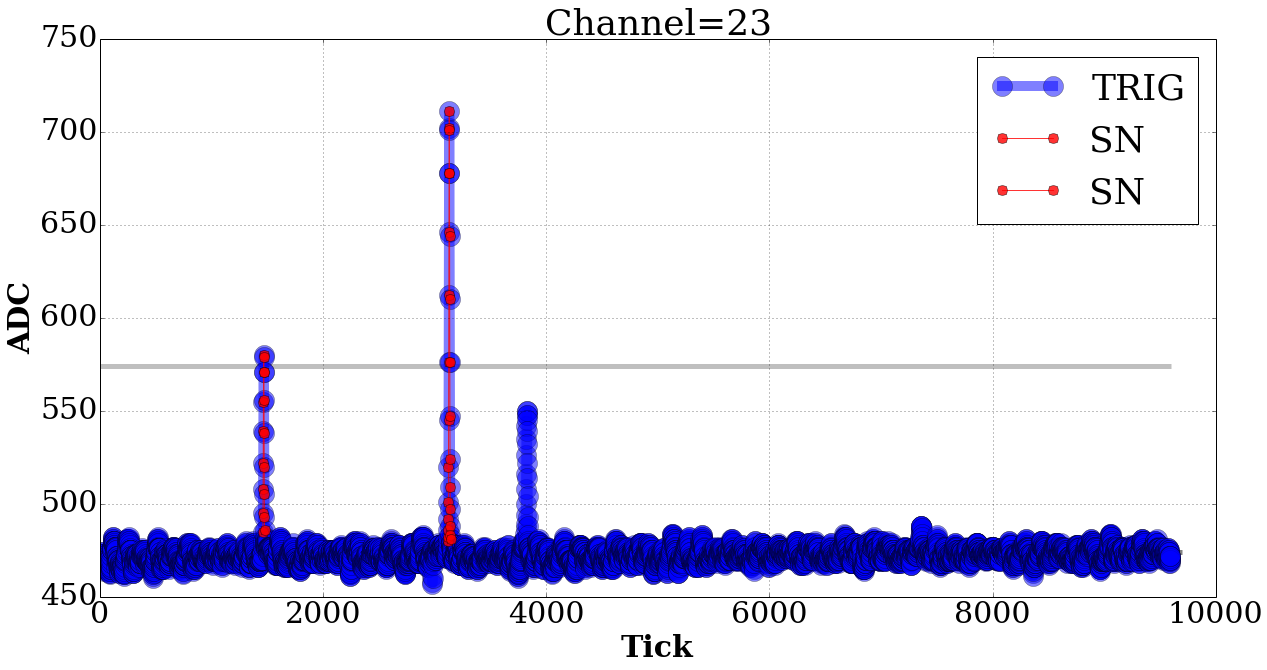

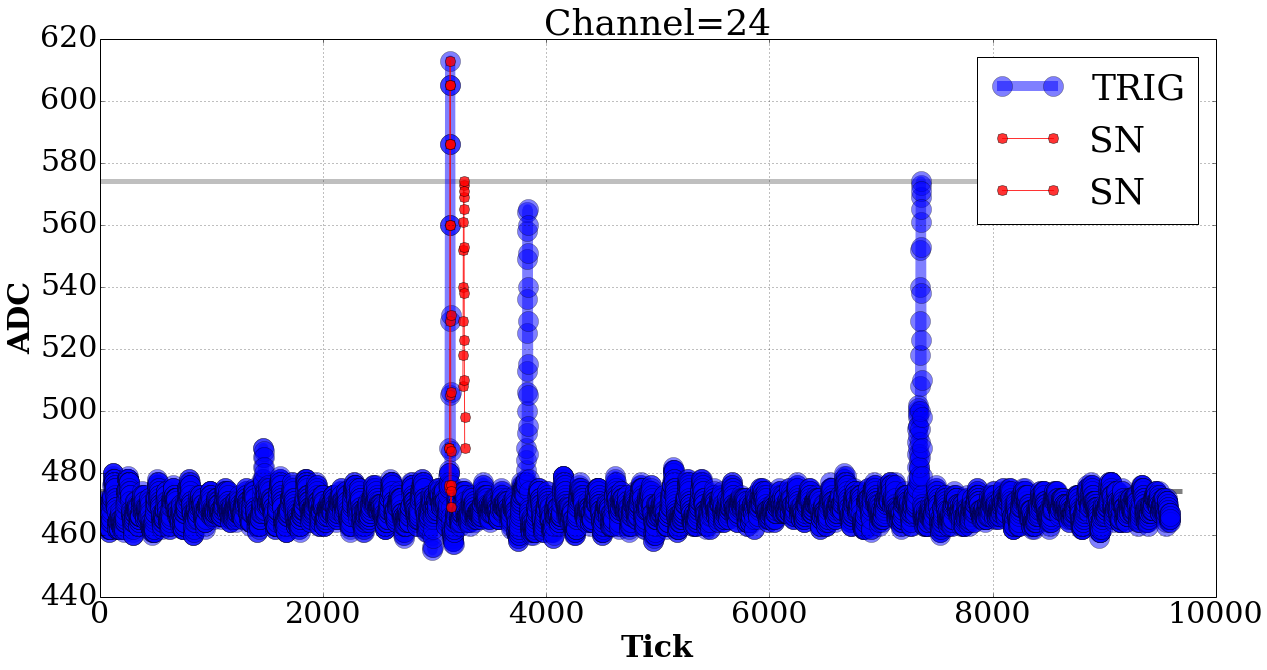

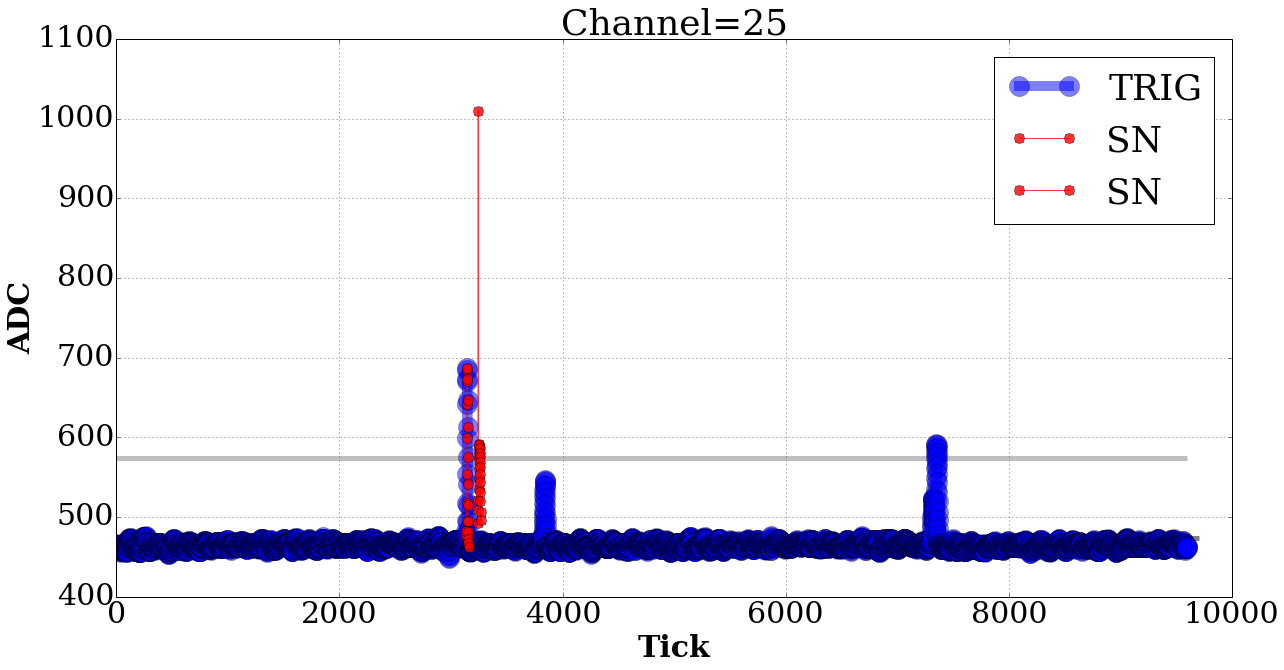

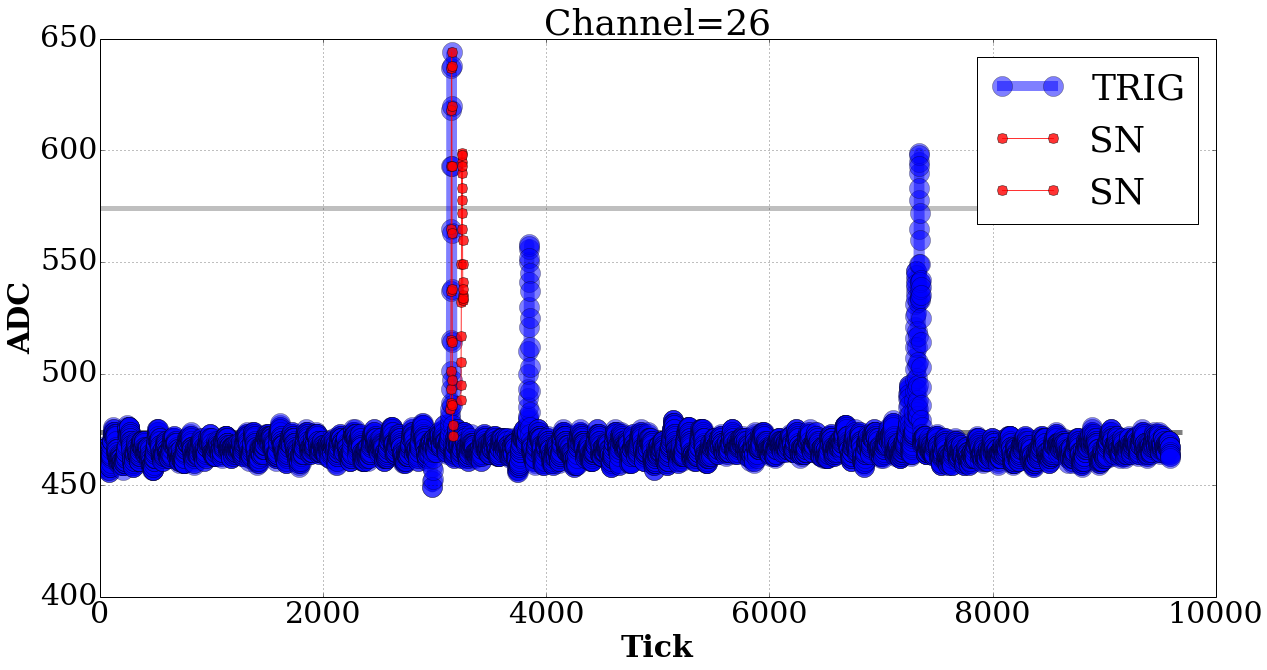

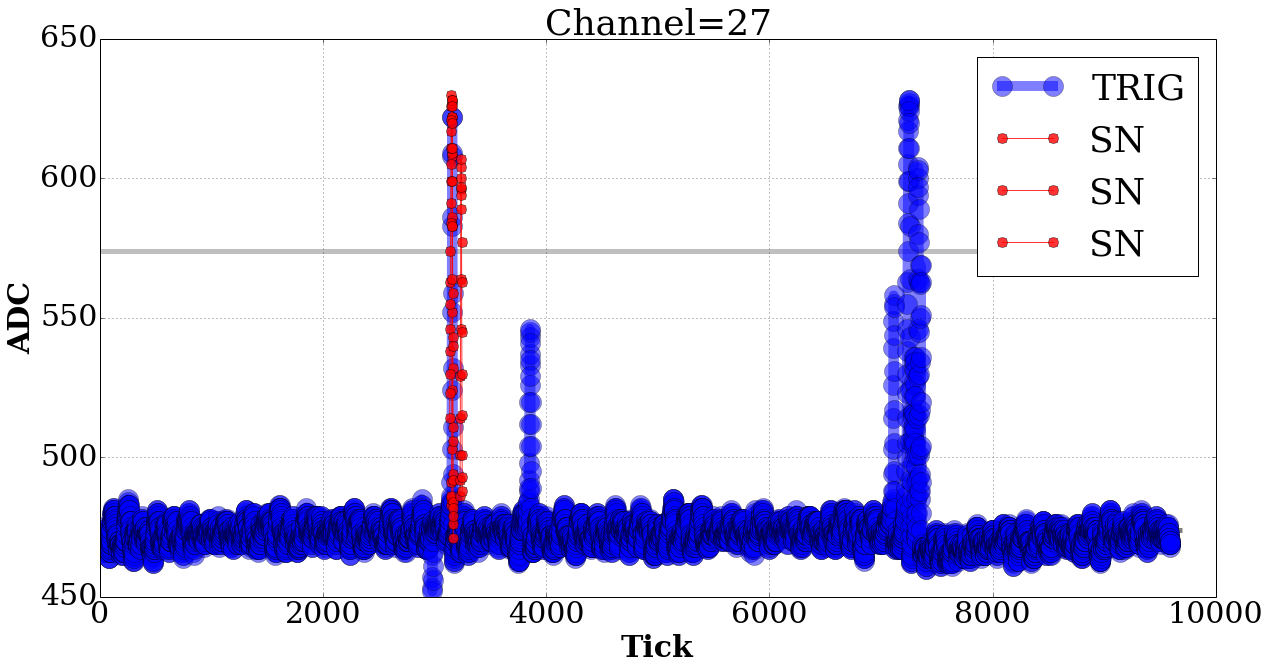

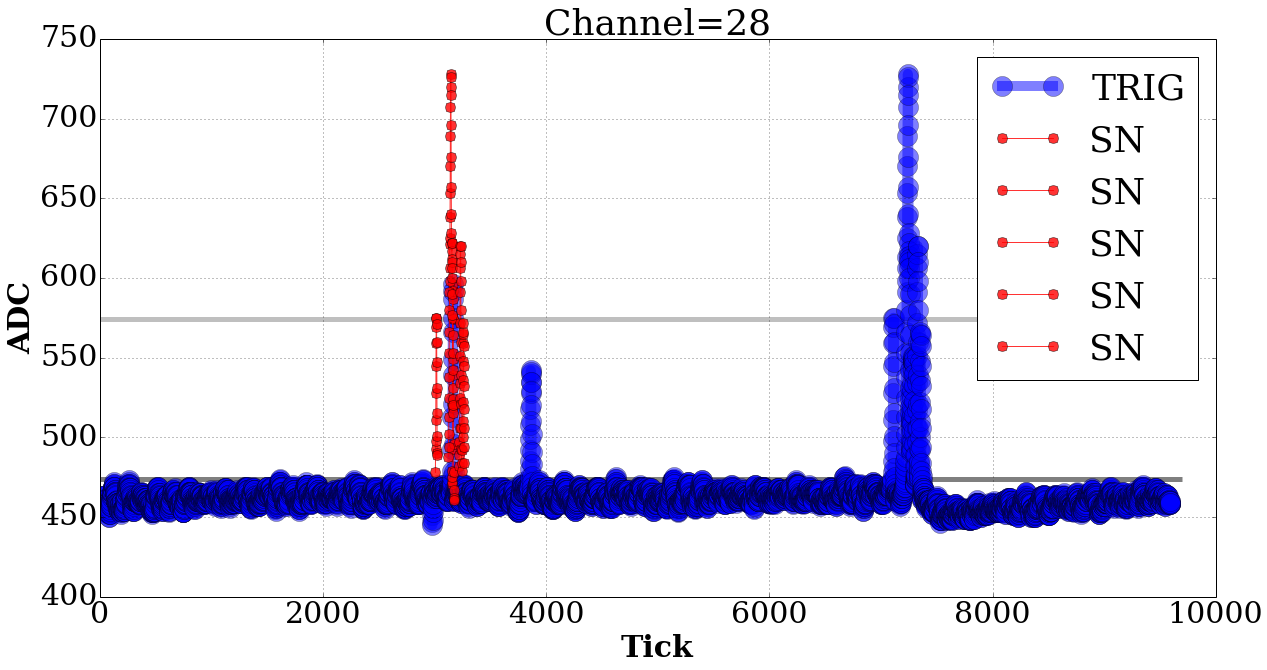

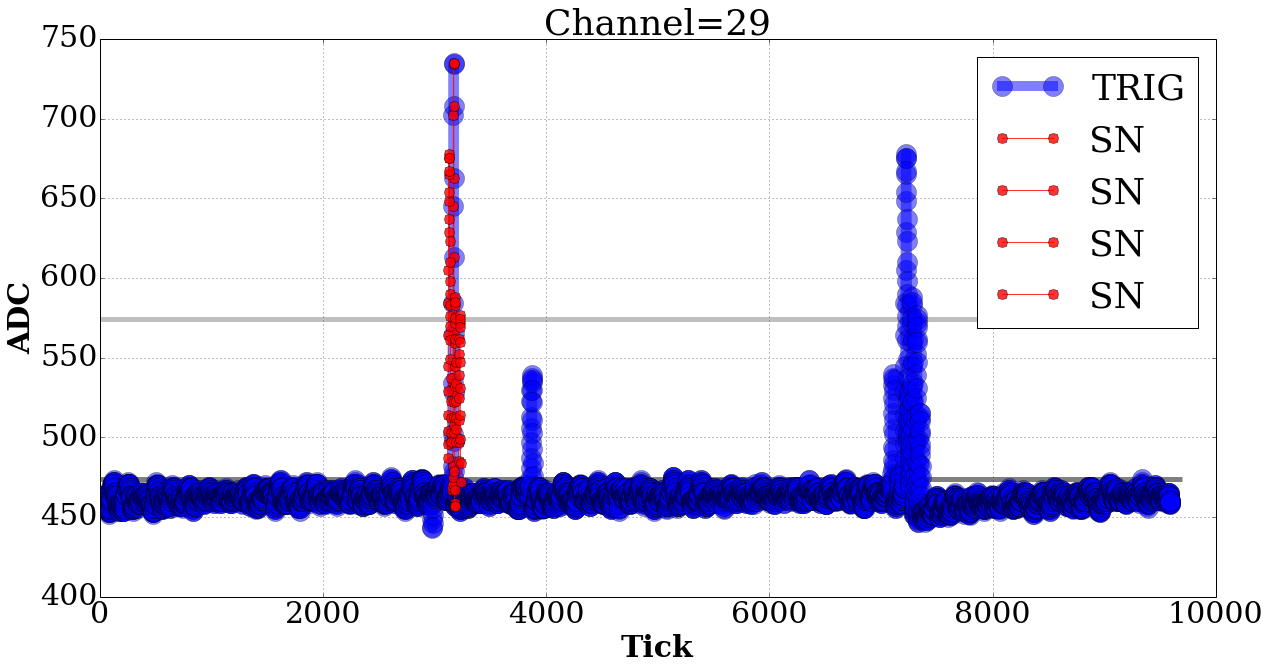

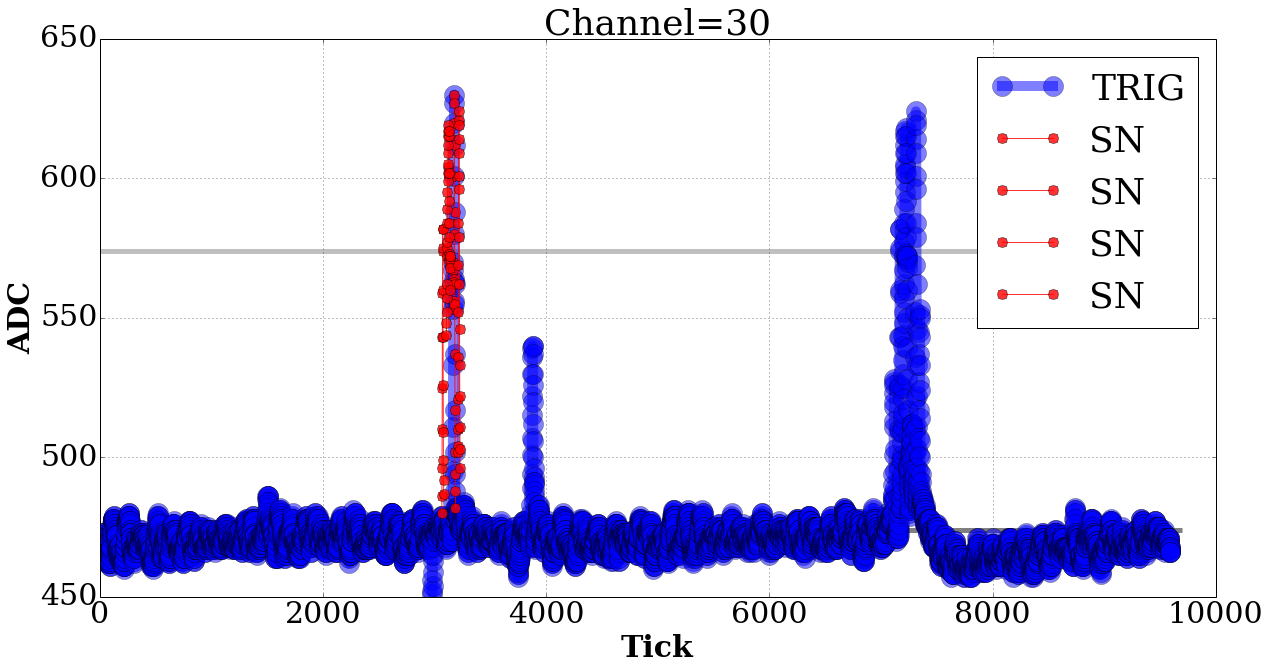

IndexError: index out of range

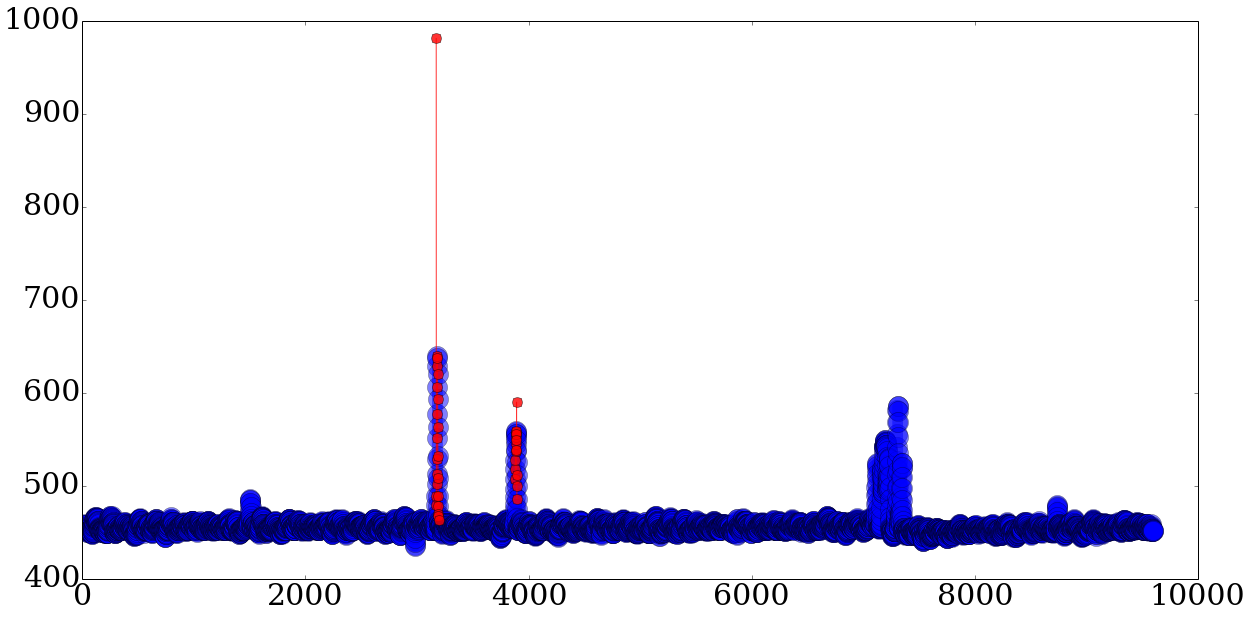

In [45]:
so=-1
for to in xrange(32):
    fig,ax=plt.subplots(figsize=(20,10))
    
    tbr=trig_br[32+to]
    plt.plot(np.array(tbr),'-o',lw=10,alpha=0.5,markersize=20,label='TRIG')

    while True:
        so+=1
        sbr = snova_br[so]
        if sbr.ChannelNumber() != tbr.ChannelNumber(): 
            so-=1
            break
        
        plt.plot(np.arange(sbr.TimeStamp(),
                           sbr.TimeStamp()+sbr.size(),1.0),
                 np.array(sbr),'-o',color='red',markersize=10,alpha=0.8,label='SN')

    #ax.set_xlim(2978-5,2978+300)
    #ax.set_xlim(2990,3000)
    #ax.set_xlim(0,5)
    #ax.set_ylim(620,636)
    #ax.set_ylim(465,480)
    ax.set_xlabel('Tick',fontweight='bold')
    ax.set_ylabel('ADC',fontweight='bold')
    ax.hlines(474,0,9700,alpha=0.5,lw=5)
    ax.hlines(474+100,0,9600,alpha=0.5,lw=5,color='grey')
    ax.legend() 
    #ax.set_ylim(450,750)
    ax.set_title("Channel=%s"%to)
    plt.grid()
    #plt.savefig('a%02d.png'%to,type='png')
    plt.show()